In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import confusion_matrix

In [13]:
from sklearn.metrics import r2_score
from math import sqrt

In [14]:
train = pd.read_csv('df_train_copy')

In [15]:
train = train[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established']]

train_copy = train

In [16]:
def do_dataset(input_dataset):
    ip_dataset = input_dataset.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
    print('..........unnecessary columns deleted')
    print('dataset size :',ip_dataset.shape)
    
    le = LabelEncoder()
    to_encode = ['Outlet_Size']
    for i in to_encode:
        ip_dataset[i] =le.fit_transform(ip_dataset[i])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(le_name_mapping)
    print('..........label encoding completed')
    print('dataset size :',ip_dataset.shape)
    
    
    cat_cols = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type']
    dataset = pd.get_dummies(data = ip_dataset, prefix_sep='_', columns = cat_cols, drop_first =True, dtype='int8')
    print('..........dummy variables created')
    print('dataset size :',dataset.shape)
    
    return dataset

In [17]:
def run_regression(reg_dataset):
    
    features = reg_dataset.columns[reg_dataset.columns != 'Item_Outlet_Sales']
    
    X =  reg_dataset.loc[:, reg_dataset.columns != 'Item_Outlet_Sales']
    y =  reg_dataset['Item_Outlet_Sales']
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=22)    
    
    lin_reg = LinearRegression(normalize = True)
    lin_reg.fit(X_train,y_train)
    y_pred = lin_reg.predict(X_val)
    
    #plt.figure(figsize=(8,12))
    #sns.barplot(lin_reg.coef_,features)
    print('Intercept : ', lin_reg.intercept_)
    #coef = pd.Series(lin_reg.coef_,features).sort_values()
    #print('---------------- coefficients -------------------') 
    #print(coef) 
    
    df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
    #ax1 = sns.displot(df['Actual'], color = 'red', label = "Actual values")
    #sns.displot(df['Actual'], color = 'blue', label = "Predicted values", ax = ax1)
    
    sns.distplot(df['Actual'], hist=False, rug=True, label = 'Actual')
    sns.distplot(df['Predicted'], hist=False, rug=True, label = 'Pred')
    plt.legend()
    plt.show()
    
    R2   = r2_score(y_val,y_pred)
    MAE  = metrics.mean_absolute_error(y_val,y_pred)
    MSE  = metrics.mean_squared_error(y_val,y_pred)
    RMSE = sqrt(MSE)

    print("R2 : {}, MAE : {}, MSE : {}, RMSE : {}".format(R2, MAE, MSE, RMSE))

In [18]:
reg_train = do_dataset(train)

..........unnecessary columns deleted
dataset size : (8523, 10)
{'High': 0, 'Medium': 1, 'Small': 2}
..........label encoding completed
dataset size : (8523, 10)
..........dummy variables created
dataset size : (8523, 27)


In [19]:
reg_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Years_Established,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1,3735.1380,22,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,1,443.4228,12,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1,2097.2700,22,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,19.20,0.066132,182.0950,1,732.3800,23,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.066132,53.8614,0,994.7052,34,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


Intercept :  -1705.639211550218


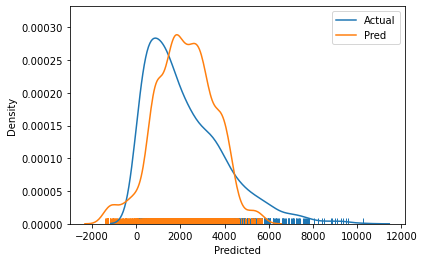

R2 : 0.5395174083066159, MAE : 881.439523456149, MSE : 1423040.3558265327, RMSE : 1192.9125516258653


In [20]:
run_regression(reg_train)

#### Handling Outliers

outlier handling methods : https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

In [21]:
encoded_train_copy = do_dataset(train_copy)

..........unnecessary columns deleted
dataset size : (8523, 10)
{'High': 0, 'Medium': 1, 'Small': 2}
..........label encoding completed
dataset size : (8523, 10)
..........dummy variables created
dataset size : (8523, 27)


In [22]:
#isolation forest method

iso = IsolationForest(contamination = 0.05)
yhat = iso.fit_predict(encoded_train_copy)
mask = yhat != -1

In [23]:
print(encoded_train_copy.shape)
outlier_treated = encoded_train_copy[mask]
print(outlier_treated.shape)

(8523, 27)
(8096, 27)


Intercept :  -1654.6117068856493


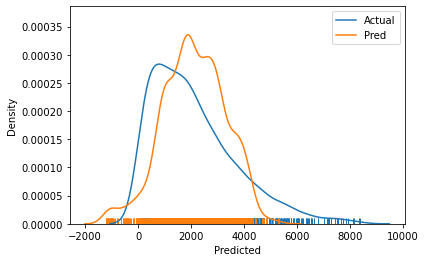

R2 : 0.5416610285059481, MAE : 802.2177500200087, MSE : 1170186.6741457141, RMSE : 1081.7516693519424


In [24]:
run_regression(outlier_treated)

In [ ]:
#minimum covariance determinant method

ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)

In [ ]:
train_copy